In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [45]:
#Data frames
Mers_Twist = pd.read_csv('mersenne_twist.txt')
Xor_Shift = pd.read_csv('xorshiftt.txt')
QRNG_No = pd.read_csv("QRNG_fixed.txt")

In [46]:
def generate_random_walk(arr):
    # Select 5000 random indices from the dataset
  random_indices = np.random.choice(len(arr), size=5000, replace=False)

  # Initialize starting position for the random walk
  current_position = [0, 0]
  position = []

  # Perform 2D random walk
  for idx in random_indices:
      # Generate random increments of -1, 0, or 1 for each step
      increment_x = np.random.choice([-1, 0, 1])
      increment_y = np.random.choice([-1, 0, 1])

      # Update current position
      current_position[0] += increment_x
      current_position[1] += increment_y

      position.append([current_position[0], current_position[1]])

  return position

def calculate_msd(random_walk):
    n = len(random_walk)
    msd = np.zeros(n)

    for i in range(1, n):
        x_train = random_walk[i][0] - random_walk[0][0]
        y_train = random_walk[i][1] - random_walk[0][1]
        squared_displacement = x_train ** 2 + y_train**2
        msd[i] = np.mean(squared_displacement)

    return msd


In [47]:
# Generate a random walk and calculate MSD
num_steps = 5000
random_walk_Xor = generate_random_walk(Xor_Shift)

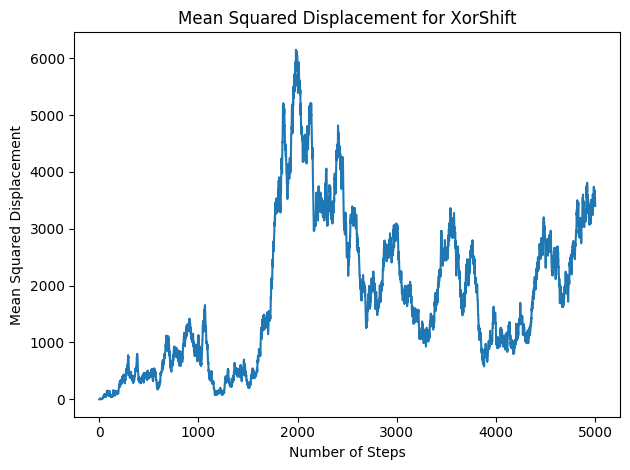

In [48]:

msd_values_Xor = calculate_msd(random_walk_Xor)

# Plot MSD as a function of the number of steps
num_steps = range(len(random_walk_Xor))
plt.plot(num_steps, msd_values_Xor)
plt.xlabel('Number of Steps')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement for XorShift')
# Add thousands separator for large values on y-axis
def custom_formatter(x, pos):
    return f'{int(x):,}' if x >= 10000 else f'{x:g}'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()


In [49]:
# Generate a random walk and calculate MSD
num_steps = 5000
random_walk_Mers = generate_random_walk(Mers_Twist)

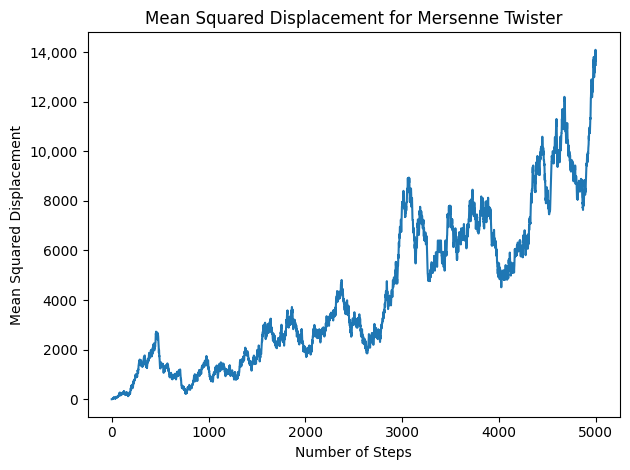

In [50]:
msd_values_Mers = calculate_msd(random_walk_Mers)

# Plot MSD as a function of the number of steps
num_steps = range(len(random_walk_Mers))
plt.plot(num_steps, msd_values_Mers)
plt.xlabel('Number of Steps')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement for Mersenne Twister')
# Add thousands separator for large values on y-axis
def custom_formatter(x, pos):
    return f'{int(x):,}' if x >= 10000 else f'{x:g}'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()


In [53]:
# Generate a random walk and calculate MSD
num_steps = 5000
random_walk_Qrng = generate_random_walk(QRNG_No)

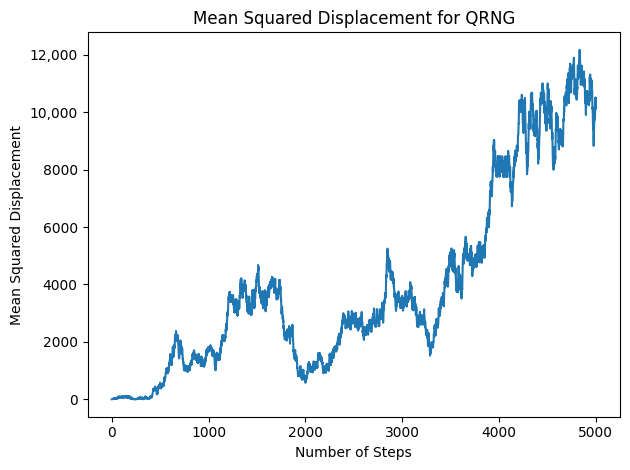

In [54]:
msd_values_Qrng = calculate_msd(random_walk_Qrng)

# Plot MSD as a function of the number of steps
num_steps = range(len(random_walk_Qrng))
plt.plot(num_steps, msd_values_Qrng)
plt.xlabel('Number of Steps')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement for QRNG')
# Add thousands separator for large values on y-axis
def custom_formatter(x, pos):
    return f'{int(x):,}' if x >= 10000 else f'{x:g}'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

plt.tight_layout()
plt.show()
